TRIOS_VIPER_AbsorptionCoefficient_plot.py<br>
Description: convert optical density measured with Trios Viper spectrophotometer to absorption coefficient and plot values in a graph<br>
Author: Martin Rapilly, Geosciences Environnement Toulouse<br>

<br>Download the CSV file from VIPER spectrophotometer. <br>Open the ABSORPTI file with OpenOffice Calc and convert it to excel.<br>
In column Comment2, add a description of the sample location. For example: "Station 1, field measurement" or "blank" <br>
In column Comment3, add the path length in meter. For example: 0.05<br>
For each path length used for the samples, a corresponding blank has to be entered in the excel file. For instance, if a sample is taken on station 4 in situ (path length of 10 cm), values for a blank with a path length of 10 cm have to be entered in the file (with "blank" in column Comment2 and "0.1" in column Comment3.<br>
The structure should look like this:<br>
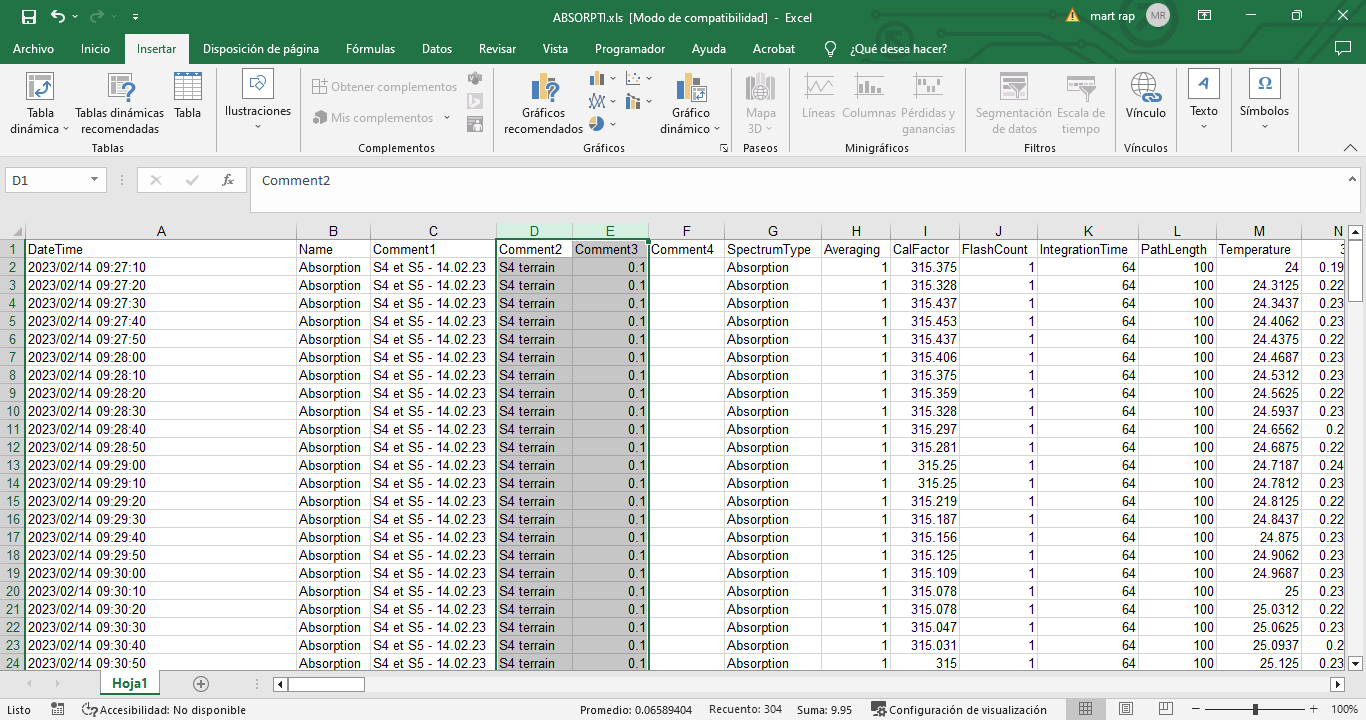
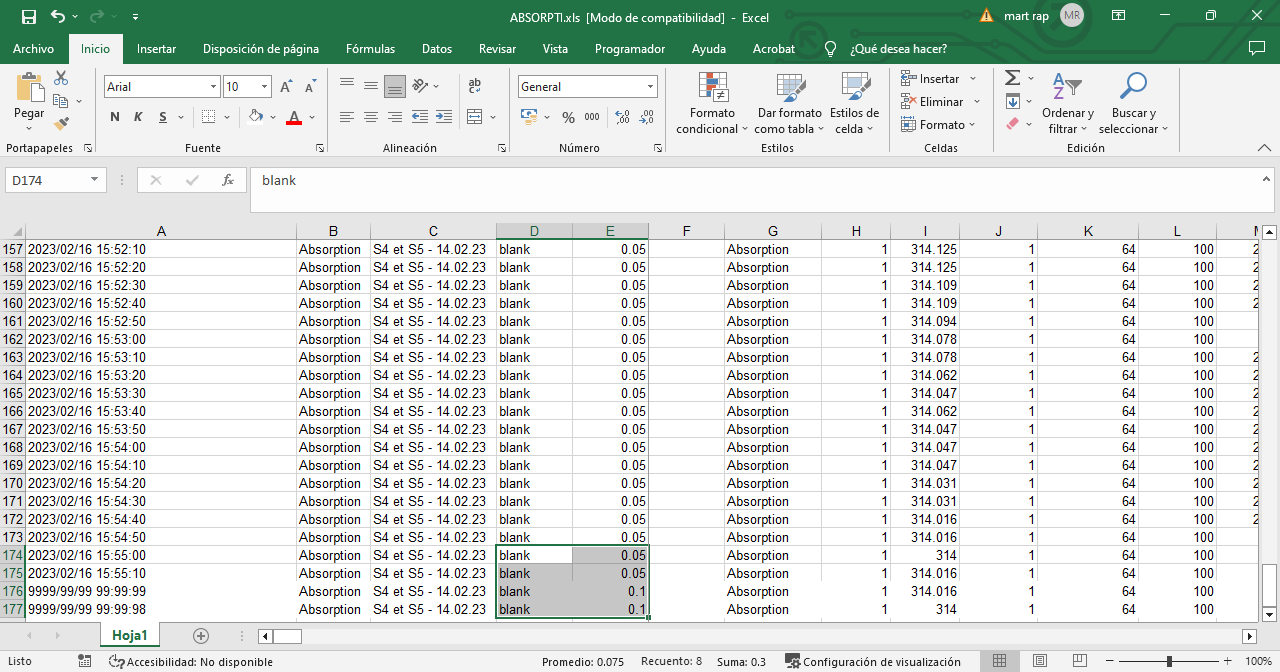

Define the path of your ABSORPTI.xls file and your output folder,Then run the rest of the code

In [14]:
#input file
excel=r"F:\...\ABSORPTI.xls"

#output folder
outPath=r"C:\Users\marti\Downloads"

In [15]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd

#read excel file and convert it to a pandas dataframe
df = pd.read_excel(excel)

#create a list of samples defined by their descriptions in column2 (station 1 at 0.22 microns, station 2 at 0.45 microns, etc.)
listSamples=df['Comment2'].unique().tolist()
print (listSamples)

#create a list of wavelengths that are sampled by the spectrophotometer (contained in the names of columns 13 to 190)
listColNamesWL=[]
for colname in df.columns[13:191]:
    value=float(colname)
    listColNamesWL.append(value)
print ("listColNamesWL",listColNamesWL)

#calculate median values for blanks with pathlengths of 0.04 and 0.05 meter and store it in a dataframe
listBlank=[]#temporary list to store blank values and put it into a dataframe
dfBlank004=pd.DataFrame()#dataframe for the blank with a pathlength of 0.04 m (4 cm)
dfBlank005=pd.DataFrame()#dataframe for the blank with a pathlength of 0.05 m (5 cm)


#Get absorption coefficients for the blanks
#Get Optical Density values and convert it to an absorption coefficient for all wavelength in a list if they correspond to one same blank with the same wavelength
for line in range(df.shape[0]):#check all lines in the excel file
    if df.iloc[line]["Comment2"]=='blank' and float(df.iloc[line]["Comment3"])==0.05:#get values of blanks with pathlength of 0.05 meter
        for value in range (13,191):#get values for all wavelengths (stored in columns 13 to 190)
            listBlank.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3']))#calculate the absorption coefficient
        dfBlank005[df.iloc[line]["DateTime"]] = listBlank#load the list to the temporary dataframe as a new column with name corresponding to the date
        listBlank=[]#empty the list for next loop
    elif df.iloc[line]["Comment2"]=='blank' and float(df.iloc[line]["Comment3"])==0.04:#get values of blanks with pathlength of 0.04 meter
        print ("0.04")
        for value in range (13,191):
            listBlank.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3']))
        dfBlank004[df.iloc[line]["DateTime"]] = listBlank
        listBlank=[]
        
#calculate median values for the blanks        
dfBlank004['blankMedian'] = dfBlank004.median(axis=1)
dfBlank005['blankMedian'] = dfBlank005.median(axis=1)

#store median values for the blanks in separate lists
listBlankMedian004 = dfBlank004["blankMedian"].values.tolist()
listBlankMedian005 = dfBlank005["blankMedian"].values.tolist()

#for 0.1 meter (in situ sampling), we use pure water absorption coefficients from Pope and Fry,1997
listPureWater = [0.047476,0.0455062,0.0419488,0.0419026,0.03978328,0.03788588,0.03658307,0.03488931,0.03319634,0.03150337,0.029554743,0.025562334,0.023436651,0.017583105,0.013594422,0.011038834,0.010172101,0.004527496,0.009168493,0.008642837,0.008332018,0.008215119,0.008051095,0.007538461,0.006552941,0.005839163,0.00538586,0.005121298,0.004881329,0.004641905,0.00449567,0.004437373,0.004420038,0.004501371,0.004671211,0.00477166,0.004784718,0.004840585,0.004952559,0.005027949,0.005210727,0.005580279,0.006035945,0.006528538,0.00703616,0.007505849,0.008160745,0.008955834,0.00954004,0.009692278,0.009591759,0.009586074,0.009775126,0.01000986,0.010103614,0.010127057,0.010324872,0.01065976,0.010920824,0.01133557,0.01191391,0.012475661,0.012885731,0.013214941,0.013702622,0.014370039,0.014875923,0.01579123,0.016720713,0.017935369,0.01938449,0.020507132,0.022518302,0.024922085,0.026909022,0.029767025,0.033898682,0.037600335,0.039544825,0.039654177,0.040498522,0.041343202,0.041607048,0.04187992,0.042789076,0.043309885,0.044352814,0.0449591,0.045702007,0.04682515,0.047489158,0.048749397,0.050521673,0.052626793,0.054868216,0.057385362,0.059377198,0.059597636,0.060352477,0.061309965,0.062993241,0.064063537,0.064558251,0.067084789,0.069062468,0.071931024,0.075048567,0.079177467,0.084547318,0.089587146,0.097173731,0.10621147,0.115982081,0.126157005,0.137901799,0.151565723,0.16445154,0.183378906,0.19553215,0.231778375,0.249573,0.257707581,0.262293088,0.26400184,0.265416144,0.266939556,0.26815724,0.270682565,0.274503318,0.279336984,0.281914764,0.28556594,0.290591576,0.291525119,0.29805226,0.30055761,0.303926263,0.308444416,0.311825622,0.321019449,0.32418655,0.326182834,0.33663124,0.343553677,0.35835737,0.36918612,0.38603,0.40228173,0.415324388,0.425107738,0.428920282,0.434902104,0.437473186,0.443283565,0.44809072,0.44900362,0.45965495,0.46386124,0.471777435,0.48096276,0.488659532,0.501789455,0.5132291,0.529745535,0.546884504,0.567237776,0.594584408,0.620685194,0.651513358,0.684168159,0.720273755,0.766044038,0.824788808,0.894767361,0.967768404,1.05153752,1.14384598,1.23499756]

listSamples.remove("blank")#remove blanks from the list of measurements for next step

['S4 terrain', 'S5 terrain', 'blank', 'S4 - 0.22 micrometer', 'S5 - 0.22 micrometer', 'S4 - 0.45 micrometer', 'S5 - 0.45 micrometer']
listColNamesWL [348.8, 350.945, 353.09, 355.235, 357.379, 359.524, 361.667, 363.811, 365.954, 368.097, 370.239, 372.382, 374.523, 376.665, 378.806, 380.947, 383.087, 385.227, 387.367, 389.506, 391.645, 393.784, 395.922, 398.059, 400.197, 402.334, 404.47, 406.606, 408.742, 410.877, 413.012, 415.147, 417.281, 419.414, 421.547, 423.68, 425.812, 427.944, 430.076, 432.207, 434.337, 436.467, 438.597, 440.726, 442.854, 444.982, 447.11, 449.237, 451.364, 453.49, 455.615, 457.74, 459.865, 461.989, 464.113, 466.236, 468.358, 470.48, 472.602, 474.723, 476.843, 478.963, 481.082, 483.201, 485.319, 487.437, 489.554, 491.671, 493.786, 495.902, 498.017, 500.131, 502.244, 504.357, 506.47, 508.582, 510.693, 512.803, 514.913, 517.023, 519.131, 521.239, 523.347, 525.454, 527.56, 529.665, 531.77, 533.875, 535.978, 538.081, 540.183, 542.285, 544.386, 546.486, 548.586, 550.685

In [16]:
#optional: create graphs for blanks and pure water absorption coefficients
dfTemp = pd.DataFrame({'wavelength': listColNamesWL})
if listBlankMedian004:#check if list is empty or not. If empty, it doesn´t add the list to the dataframe
    dfTemp['Blank with 0.04 m pathlength']= listBlankMedian004
    print (listBlankMedian004)
if listBlankMedian005:
    dfTemp['Blank with 0.05 m pathlength']= listBlankMedian005
if listPureWater:
    dfTemp['Pure water from Pope and Fry, 1997']= listPureWater
print (dfTemp)
dfTemp.plot("wavelength",dfTemp.columns[1:],linewidth=0.5,cmap='jet')#plot with column wavelength for x-axis and all other columns for y-axis (one column per line)         
date=df.iloc[1]["DateTime"][:10]
plt.title("Absorption coefficient - blank and pure water "+' - '+ str(date))#define title with description of smaple and date
plt.xlabel('Wavelength (nm)')#define x-axis label
plt.ylabel('Absorption coefficient (m-1)')#define y-axis label
plt.tight_layout()
#plt.show()#show plots in console. warning: if this is activated, the figure cannot be saved in jpg
plt.savefig(outPath+"/AbsorptionCoefficient_blanks and pure water_"+date.replace("/", "-")+".jpg", dpi=800)#save plot to jpg
plt.close()#close plot
del dfTemp#delete temporary dataframe
print ("blanks plotting done")

     wavelength  Blank with 0.05 m pathlength  \
0       348.800                      5.329418   
1       350.945                      4.422073   
2       353.090                      4.090819   
3       355.235                      3.929033   
4       357.379                      3.821483   
..          ...                           ...   
173     711.961                      3.182645   
174     713.993                      3.073823   
175     716.024                      3.440922   
176     718.054                      2.819471   
177     720.084                      3.027773   

     Pure water from Pope and Fry, 1997  
0                              0.047476  
1                              0.045506  
2                              0.041949  
3                              0.041903  
4                              0.039783  
..                                  ...  
173                            0.894767  
174                            0.967768  
175                            1.

In [17]:
#plot absorption coefficient for each sample
#for each sample (Station 4 at 0.22 microns for instance), calculate the absorption coefficient for each line and each wavelength and store it in a dataframe
for sample in listSamples:#loop through all possible samples
    print ("sample",sample)
    dfTemp = pd.DataFrame({'wavelength': listColNamesWL})#add the list of sampled wavelength as a column named Wavelength to a temporary dataframe
    listAcoeff=[]#create an empty list that will contain the absorption coefficient for each line and all wavelengths
    for line in range(df.shape[0]):#loop through all lines (df.shape[0] gets the number of lines in the original dataframe without the line corresponding to the column names)
        if df.iloc[line]["Comment2"]== sample:#if the description in column Comment2 corresponds to the sample of interest, proceed
            date=df.iloc[line]["DateTime"][:10]#get date that will be used for figure title and file name
            pathLength=float(df.iloc[line]["Comment3"])#get the pathlength
            for value in range (13,191):#get values from column 13 to 190 (columns that contain the Optical Density value for each wavelength)
                if pathLength==0.04:
                    listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3'])-listBlankMedian004[value-13])#converts Optical Density to Absorption Coefficient, substract the blank median values with same pathlength and save it to a list
                elif pathLength==0.05:
                    listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3'])-listBlankMedian005[value-13])
                elif pathLength==0.1:
                    listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]["Comment3"])-listPureWater[value-13])
                else:
                    print ("error!")
            dfTemp[df.iloc[line]["DateTime"]] = listAcoeff#load listAcoeff to the temporary dataframe as a new column with name corresponding to the date
            listAcoeff=[]#empty the list for next loop
    
    #plot the data
    dfTemp['SampleMedian'] = dfTemp.median(axis=1)#calculate median value of the absorption coefficient for each wavelength from all measurements of the same sample
    dfTemp.plot("wavelength",dfTemp.columns[1:],linewidth=0.3,cmap='jet')#plot with column wavelength for x-axis and all other columns for y-axis (one column per line)         
    plt.gca().get_lines()[-1].set_color("black")#modify color of the last line, i.e. the one corresponding to the calculated median value
    plt.gca().get_lines()[-1].set_linewidth(0.7)#modify linewidth of the last line, i.e. the one corresponding to the calculated median value       
    plt.title("Absorption coefficient - "+ sample +' - '+ str(date))#define title with description of smaple and date
    plt.xlabel('Wavelength (nm)')#define x-axis label
    plt.ylabel('Absorption coefficient (m-1)')#define y-axis label
    plt.legend('',frameon=False)#remove legend from the plot
    plt.tight_layout()
    #plt.show()#show plots in console. warning: if this is activated, the figure cannot be saved in jpg
    plt.savefig(outPath+"/AbsorptionCoefficient_"+sample+'_'+date.replace("/", "-")+".jpg", dpi=800)#save plot to jpg
    plt.close()#close plot
    del dfTemp#delete temporary dataframe
    print("jpg done for sample",sample)
print ("Processing done")           

sample S4 terrain
jpg done for sample S4 terrain
sample S5 terrain
jpg done for sample S5 terrain
sample S4 - 0.22 micrometer
jpg done for sample S4 - 0.22 micrometer
sample S5 - 0.22 micrometer
jpg done for sample S5 - 0.22 micrometer
sample S4 - 0.45 micrometer
jpg done for sample S4 - 0.45 micrometer
sample S5 - 0.45 micrometer
jpg done for sample S5 - 0.45 micrometer
Processing done


In [18]:
##plot absorption coefficient for each sample with normalized curved to 700 nm (shifted data with absorption = 0 at 700 nm)
for sample in listSamples:#loop through all possible samples
    print ("sample",sample)
    dfTemp = pd.DataFrame({'wavelength': listColNamesWL})#add the list of sampled wavelength as a column named Wavelength to a temporary dataframe
    listAcoeff=[]#create an empty list that will contain the absorption coefficient for each line and all wavelengths
    for line in range(df.shape[0]):#loop through all lines (df.shape[0] gets the number of lines in the original dataframe without the line corresponding to the column names)
        if df.iloc[line]["Comment2"]== sample:#if the description in column Comment2 corresponds to the sample of interest, proceed
            date=df.iloc[line]["DateTime"][:10]#get date that will be used for figure title and file name
            pathLength=float(df.iloc[line]["Comment3"])#get the pathlength
           
            for value in range (13,191):#get values from column 13 to 190 (columns that contain the Optical Density value for each wavelength)
                
                if pathLength==0.04:
                    value700nm=float(df.iloc[line][180])*2.303/pathLength-listBlankMedian004[value-13]
                    listAcoeff.append(float(df.iloc[line][value])*2.303/pathLength-listBlankMedian004[value-13]-value700nm)#converts Optical Density to Absorption Coefficient, substract the blank median values with same pathlength and save it to a list
                elif pathLength==0.05:
                    value700nm=float(df.iloc[line][180])*2.303/pathLength-listBlankMedian005[value-13]
                    listAcoeff.append(float(df.iloc[line][value])*2.303/pathLength-listBlankMedian005[value-13]-value700nm)
                elif pathLength==0.1:
                    value700nm=float(df.iloc[line][180])*2.303/pathLength-listPureWater[value-13]
                    listAcoeff.append(float(df.iloc[line][value])*2.303/pathLength-listPureWater[value-13]-value700nm)
                else:
                    print ("error!")
            dfTemp[df.iloc[line]["DateTime"]] = listAcoeff#load listAcoeff to the temporary dataframe as a new column with name corresponding to the date
            listAcoeff=[]#empty the list for next loop
    
    #plot the data
    dfTemp['SampleMedian'] = dfTemp.median(axis=1)#calculate median value of the absorption coefficient for each wavelength from all measurements of the same sample
    dfTemp.plot("wavelength",dfTemp.columns[1:],linewidth=0.3,cmap='jet')#plot with column wavelength for x-axis and all other columns for y-axis (one column per line)         
    plt.gca().get_lines()[-1].set_color("black")#modify color of the last line, i.e. the one corresponding to the calculated median value
    plt.gca().get_lines()[-1].set_linewidth(0.7)#modify linewidth of the last line, i.e. the one corresponding to the calculated median value       
    plt.axhline(y=0, color='r',lw=0.4, linestyle='--')
    plt.title("Absorption coefficient - "+ sample +' - '+ str(date)+' - shifted at 0 for 700 nm',fontsize = 10)#define title with description of smaple and date
    plt.xlabel('Wavelength (nm)')#define x-axis label
    plt.ylabel('Absorption coefficient (m-1)')#define y-axis label
    plt.legend('',frameon=False)#remove legend from the plot
    plt.tight_layout()
    #plt.show()#show plots in console. warning: if this is activated, the figure cannot be saved in jpg
    plt.savefig(outPath+"/AbsorptionCoefficient_"+sample+'_'+date.replace("/", "-")+"_shifted700nm.jpg", dpi=800)#save plot to jpg
    plt.close()#close plot
    del dfTemp#delete temporary dataframe
    print("jpg done for sample",sample)
print ("Processing done")    

sample S4 terrain
jpg done for sample S4 terrain
sample S5 terrain
jpg done for sample S5 terrain
sample S4 - 0.22 micrometer
jpg done for sample S4 - 0.22 micrometer
sample S5 - 0.22 micrometer
jpg done for sample S5 - 0.22 micrometer
sample S4 - 0.45 micrometer
jpg done for sample S4 - 0.45 micrometer
sample S5 - 0.45 micrometer
jpg done for sample S5 - 0.45 micrometer
Processing done
